In [3]:
import numpy as np
import pandas as pd

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

### Create a function that plots the distribution of the digits of a given array compared to the distribution of Benford's law

In [6]:
b= np.array([0,30.1, 17.6,12.5,9.7,7.9,6.7,5.8,5.1,4.6])
def benford(n):
    return b*n/100
benford(5674)

array([   0.   , 1707.874,  998.624,  709.25 ,  550.378,  448.246,
        380.158,  329.092,  289.374,  261.004])

In [7]:
def Benf(w):
    # extract the first digit
    for j in range(len(w)):
        w[j]=int(str(w[j])[0])
    
    # count the frequency of each digit
    count = pd.Series(w).value_counts().sort_index()
    
    # it might be that a digit is missing. put zero instead.
    c = pd.DataFrame(count)
    c.index= [int(x) for x in c.index]
    z = pd.DataFrame({'a': np.zeros(10)},np.arange(0,10))
    join_df = c.join(z,how='outer').fillna(0)
    c = list(join_df[0]+join_df['a'])
    
    # plot this distribution and the one according to Benford's law
    fig = plt.figure()
    ax = fig.gca()
    ax.set_xticks(np.arange(0, 10))
    plt.scatter(np.arange(0,10), c, label = 'Naive')
    plt.scatter(np.arange(0,10), benford(len(w)), color = 'r', label = 'Benford')
    # ------------> aggiungi label!!!
    ax.legend(['Array','Benford'])
    plt.grid()
    plt.show()
    
  #  print('Frequency of the given array: \n', count, '\n')
  #  print('Frequency according to Benford distribution: \n', pd.Series(benford(len(w))), '\n')
    print('Mean squared error: \n', mean_squared_error(pd.Series(benford(len(w)))/np.linalg.norm(pd.Series(benford(len(w)))),c/np.linalg.norm(c)))
    # -------------> controlla normalizzazione!!!
    return 

### Let's try it on a random array of length 5674

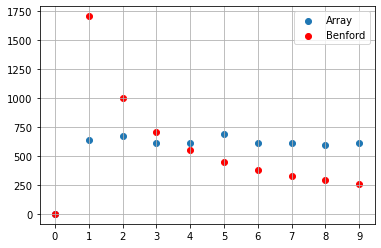

Mean squared error: 
 0.03437528199751207


In [9]:
w = np.random.rand(5674)*1000000
Benf(w)

# ---------> for con tanti vettori e vedere un errore medio

### Now it's time to take some real dataset and see whether Benford's law holds

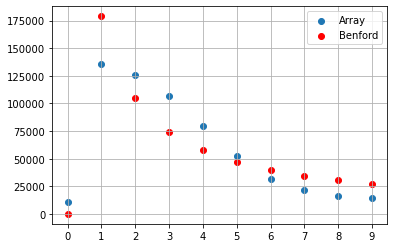

Mean squared error: 
 0.007915887631583922


In [5]:
# we take the Fraud Detection on Bank Payments dataset from 
# https://www.kaggle.com/turkayavci/fraud-detection-on-bank-payments/data

df = pd.read_csv('fraud_detection_bank_dataset.csv')

# and consider the column with the amount of the purchase 
amount = df['amount'].to_numpy()
Benf(amount)

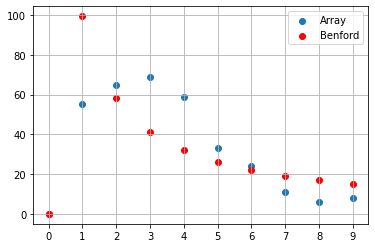

Mean squared error: 
 0.02143477182282583


In [6]:
# Consider the MusicNet dataset, a collection of 330 freely-licensed classical music recordings
# https://www.kaggle.com/imsparsh/musicnet-dataset?select=musicnet_metadata.csv

df_1 = pd.read_csv('musicnet_metadata.csv')

# and consider the column with the duration of the recording, in seconds
sec = df_1['seconds'].to_numpy()
Benf(sec)

# NOPE... it looks more like a gaussian-------> but low error

views


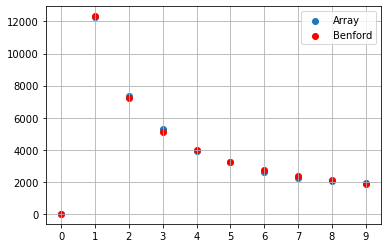

Mean squared error: 
 3.0102467959192566e-05
likes


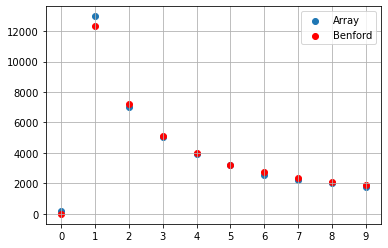

Mean squared error: 
 0.00017602090506565115
dislikes


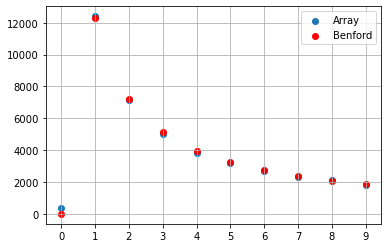

Mean squared error: 
 7.387179698519809e-05
comment_count


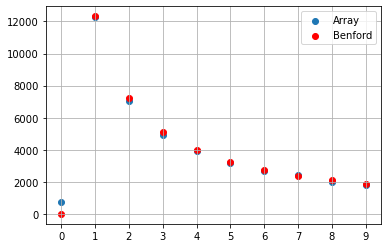

Mean squared error: 
 0.00023453220560126217


In [11]:
# Trending YouTube Video Statistics
# https://www.kaggle.com/datasnaek/youtube-new?select=USvideos.csv

dfYT = pd.read_csv('USvideos.csv')

attr = ['views', 'likes', 'dislikes', 'comment_count']

dfYT_copy= dfYT.copy()
for col in attr:
    print(col)
    Benf(dfYT_copy[col].to_numpy())
    
# WOW!! I don't need to explain the results... it fits perfectly :) 
# we could try to study the outliars and see what they have in common

In [ ]:
# ------> canale per canale?

### Let's study in more detail the YouTube dataframe

In [8]:
# missing values?

dfYT.isnull().sum() # only a large amount in the 'description' column has NaN values
dfYT.drop(['description'], axis=1, inplace= True)
dfYT.isnull().sum() 

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
dtype: int64

In [9]:
# I'm courious about how old are the videos -- I suppose the oldest have more chances to have highest views/likes/etc..

dfYT['publish_time'] = pd.to_datetime(dfYT['publish_time'])
dates = dfYT['publish_time'].copy()
print('Oldest video: ', min(dates))
print('Most recent video: ', max(dates))

Oldest video:  2006-07-23 08:24:11+00:00
Most recent video:  2018-06-14 01:31:53+00:00


In [10]:
# how many days later after the publication a video goes in the trends?

# dfYT['trending_date'] = pd.to_datetime(dfYT['trending_date'])
# it looks the dates have a strange format... convert it to timedate accordingly
dfYT['trending_date'] = pd.to_datetime(dfYT['trending_date'], format = '%y.%d.%m')
# don't consider timezone of the published time, as I don't know the one of the trending date
dfYT['publish_time'] = dfYT['publish_time'].apply(lambda x: x.replace(tzinfo=None))
# calculate the delta
diff = dfYT['trending_date']-dfYT['publish_time']

print ('Minimum time: ', diff.min())
print ('Maximum time: ', diff.max())
print ('Mean time: ', diff.mean())
print ('Median time: ', diff.median())
# mean value and mean are quite different.. the most of the videos are viral in very short time!
dfYT['trending_time'] = diff

Minimum time:  -1 days +10:59:56
Maximum time:  4214 days 15:35:49
Mean time:  16 days 05:21:53.236220
Median time:  4 days 18:59:55


In [11]:
# erase some useless column
droppable = ['video_id', 
             'tags',
             'thumbnail_link']
dfYT.drop(droppable, axis = 1, inplace= True)

In [13]:
dfYT.head()

,trending_date,title,channel_title,category_id,publish_time,views,likes,dislikes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,trending_time
0,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13 17:13:01,748374,57527,2966,15954,False,False,False,0 days 06:46:59
1,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13 07:30:00,2418783,97185,6146,12703,False,False,False,0 days 16:30:00
2,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,3191434,146033,5339,8181,False,False,False,1 days 04:54:36
3,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13 11:00:04,343168,10172,666,2146,False,False,False,0 days 12:59:56
4,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,2095731,132235,1989,17518,False,False,False,1 days 05:58:19


### We want to apply some ML! Let us predict the number of dislikes of a video from all the other features.

In [33]:
# I'll keep some rows aside for a later test of my machine

from sklearn.model_selection import train_test_split
X = dfYT.loc[:, dfYT.columns != 'dislikes'].copy()
y = dfYT.loc[:, 'dislikes'].copy()
df, df_test, dislikes, dislikes_test = train_test_split(X, y, test_size=0.2)

# put it back for a first data analysis
df['dislikes'] = dislikes

In [59]:
cols = [#'trending_date',  # datetime (I'll cancel it, consider more important the trending_time delta)
        #'publish_time',    # datetime (same as above)
        #'trending_time',     # timedelta 
        #'title',            # don't consider it for now, we'll see late if/how make use of it
        #'channel_title',    #  2171 different names (over a total of 32759 videos).. maybe interesting, but later
        'category_id',    # int - but will encode it
        'views',          # int
        'likes',          # int
        'comment_count',   # int
        'comments_disabled',  # bool-> int
        'ratings_disabled',   # bool-> int
        'video_error_or_removed',   # bool-> int
        'dislikes']         # int

# turn the booleans into 0 and 1
df[['comments_disabled','ratings_disabled', 'video_error_or_removed']] = df[['comments_disabled','ratings_disabled', 'video_error_or_removed']].astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32759 entries, 23723 to 14190
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   trending_date           32759 non-null  datetime64[ns] 
 1   title                   32759 non-null  object         
 2   channel_title           32759 non-null  object         
 3   category_id             32759 non-null  int64          
 4   publish_time            32759 non-null  datetime64[ns] 
 5   views                   32759 non-null  int64          
 6   likes                   32759 non-null  int64          
 7   comment_count           32759 non-null  int64          
 8   comments_disabled       32759 non-null  int64          
 9   ratings_disabled        32759 non-null  int64          
 10  video_error_or_removed  32759 non-null  int64          
 11  trending_time           32759 non-null  timedelta64[ns]
 12  dislikes                3275

/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


##### We can make the hypothesis that a video with a certain category_id have more dislikes.. is it true?

In [28]:
sorted(df.category_id.unique()) # category type. See for example https://gist.github.com/dgp/1b24bf2961521bd75d6c

[1, 2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 43]

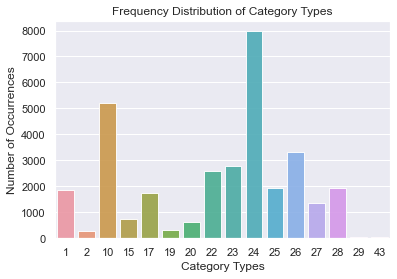

In [64]:
id_count = df['category_id'].value_counts()
sns.set(style="darkgrid")
sns.barplot(id_count.index, id_count.values, alpha=0.9)
plt.title('Frequency Distribution of Category Types')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Category Types', fontsize=12)
plt.show()

In [98]:
# ok, the videos of type 24 appear very often.. let's see how many dislikes they got..
# but first, what's the average number of dislikes?
df['dislikes'].mean() # 3756.0403553222013

# 24: Entertainment
df[df['category_id']==24]['dislikes'].mean() # 4416.616426332288
# 10: Music
df[df['category_id']==10]['dislikes'].mean()  # 7791.673787528868
                                             # that's above the mean
    
# how about the less representative types? 
# 29: Nonprofits & Activism
df[df['category_id']==29]['dislikes'].mean()  # 75474.37209302325
# 43: Shows
df[df['category_id']==29]['dislikes'].mean()  # 446.04

# 2: Autos & Vehicles
df[df['category_id']==2]['dislikes'].mean()  # 656.1958762886597
# 19: Travel & Events
df[df['category_id']==19]['dislikes'].mean() # 847.498452012384
                                             # well below the mean! 

# ok, we'll keep it in mind for the machine.. we might also bin this feature to reduce the noise..
# ----> need to investigate more!

847.498452012384

##### Are there correlations among the features? For example, between likes and dislikes? likes and views?

In [72]:
df.corr()

,category_id,views,likes,comment_count,comments_disabled,ratings_disabled,video_error_or_removed,dislikes
category_id,1.000000,-0.166969,-0.172177,-0.072351,0.048327,-0.011629,-0.034712,-0.031023
views,-0.166969,1.000000,0.851151,0.604642,0.004470,0.016811,-0.001467,0.456860
likes,-0.172177,0.851151,1.000000,0.789595,-0.028929,-0.021255,-0.001852,0.437899
comment_count,-0.072351,0.604642,0.789595,1.000000,-0.028357,-0.013859,-0.003718,0.715258
comments_disabled,0.048327,0.004470,-0.028929,-0.028357,1.000000,0.324878,-0.003048,-0.003877
ratings_disabled,-0.011629,0.016811,-0.021255,-0.013859,0.324878,1.000000,-0.001567,-0.008197
video_error_or_removed,-0.034712,-0.001467,-0.001852,-0.003718,-0.003048,-0.001567,1.000000,-0.001807
dislikes,-0.031023,0.456860,0.437899,0.715258,-0.003877,-0.008197,-0.001807,1.000000


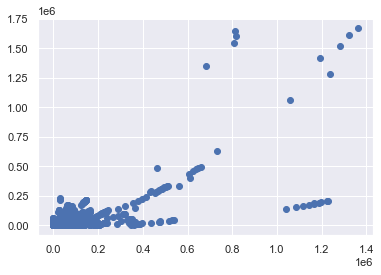

In [99]:
# let's try to visualise the the relations between number og comments and of dislikes:

plt.scatter(df.comment_count,df.dislikes)
plt.grid(True)
plt.show()

# there are some clusters... we will investigate whether they correspond to some clear groups..